In [18]:
import pandas as pd

# Load your dataset
# Replace 'your_dataset.csv' with the file path of your data
data = pd.read_csv('C:/Users/ACER/Downloads/covid TSAF/india_oringla_daily.csv')

# Calculate Recovery Rate
data['Recovery Rate (%)'] = (data['Recovered'] / data['Confirmed']) * 100

# Handle cases where Confirmed = 0 to avoid division by zero
data['Recovery Rate (%)'] = data['Recovery Rate (%)'].fillna(0)

# Preview the updated dataset
print(data.head())

# Save the updated dataset if needed
data.to_csv('updated_dataset.csv', index=False)


         Date Country/Region  Confirmed  Recovered  Deaths  Recovery Rate (%)
0  13-04-2020          India      10453       1181     358          11.298192
1  14-04-2020          India      11487       1359     393          11.830765
2  15-04-2020          India      12322       1432     405          11.621490
3  16-04-2020          India      13430       1768     448          13.164557
4  17-04-2020          India      14352       2041     486          14.221014


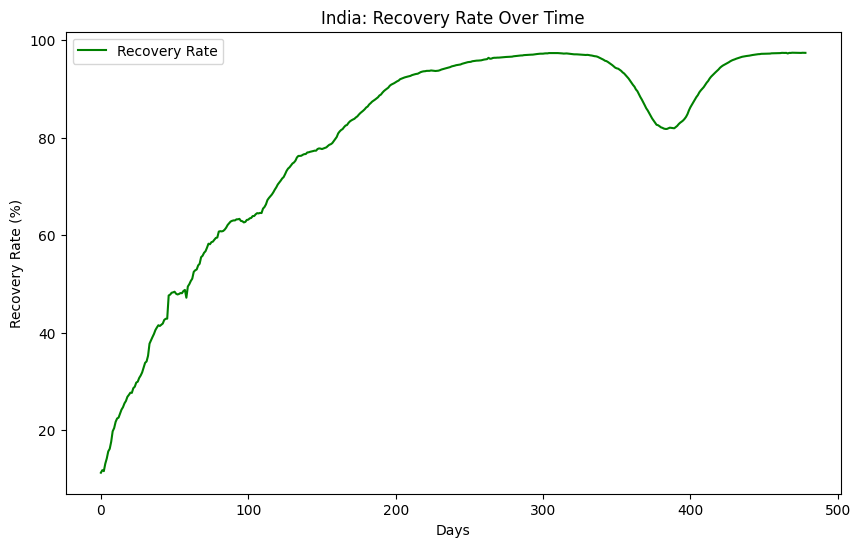

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data['Recovery Rate (%)'], label='Recovery Rate', color='green')
plt.xlabel('Days')
plt.ylabel('Recovery Rate (%)')
plt.title('India: Recovery Rate Over Time')
plt.legend()
plt.show()


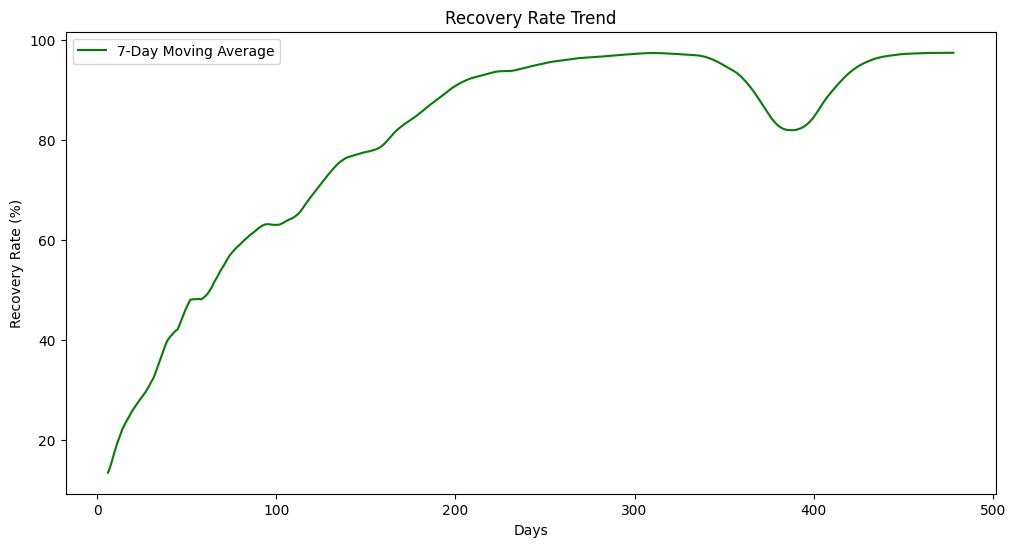

In [25]:
# Rolling Average for Smoothing
data['Recovery Rate (7-day MA)'] = data['Recovery Rate (%)'].rolling(window=7).mean()

# Plot the Recovery Rate and Rolling Average
plt.figure(figsize=(12, 6))
#plt.plot(data['Recovery Rate (%)'], label='Daily Recovery Rate (%)', alpha=0.6)
plt.plot(data['Recovery Rate (7-day MA)'], label='7-Day Moving Average', color='green')
plt.xlabel('Days')
plt.ylabel('Recovery Rate (%)')
plt.title('Recovery Rate Trend')
plt.legend()
plt.show()


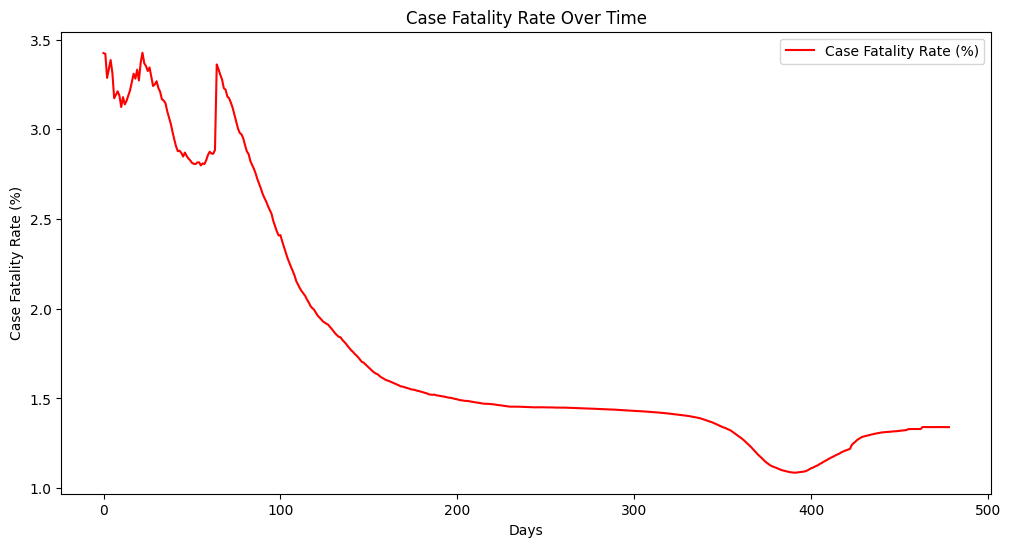

In [26]:
# Calculate Case Fatality Rate (CFR)
data['Case Fatality Rate (%)'] = (data['Deaths'] / data['Confirmed']) * 100

# Plot CFR
plt.figure(figsize=(12, 6))
plt.plot(data['Case Fatality Rate (%)'], label='Case Fatality Rate (%)', color='red')
plt.xlabel('Days')
plt.ylabel('Case Fatality Rate (%)')
plt.title('Case Fatality Rate Over Time')
plt.legend()
plt.show()


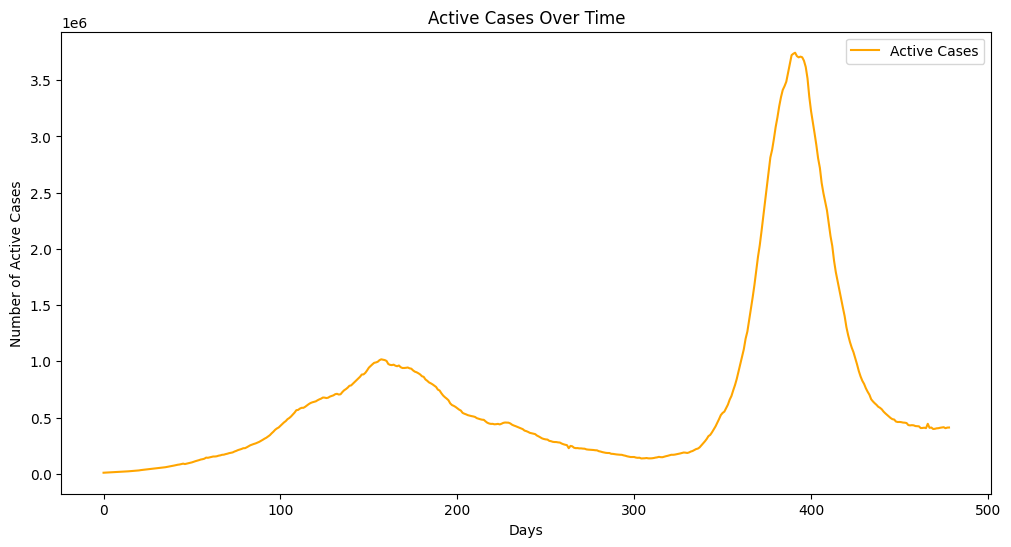

In [22]:
# Calculate Active Cases
data['Active Cases'] = data['Confirmed'] - (data['Recovered'] + data['Deaths'])

# Plot Active Cases
plt.figure(figsize=(12, 6))
plt.plot(data['Active Cases'], label='Active Cases', color='orange')
plt.xlabel('Days')
plt.ylabel('Number of Active Cases')
plt.title('Active Cases Over Time')
plt.legend()
plt.show()


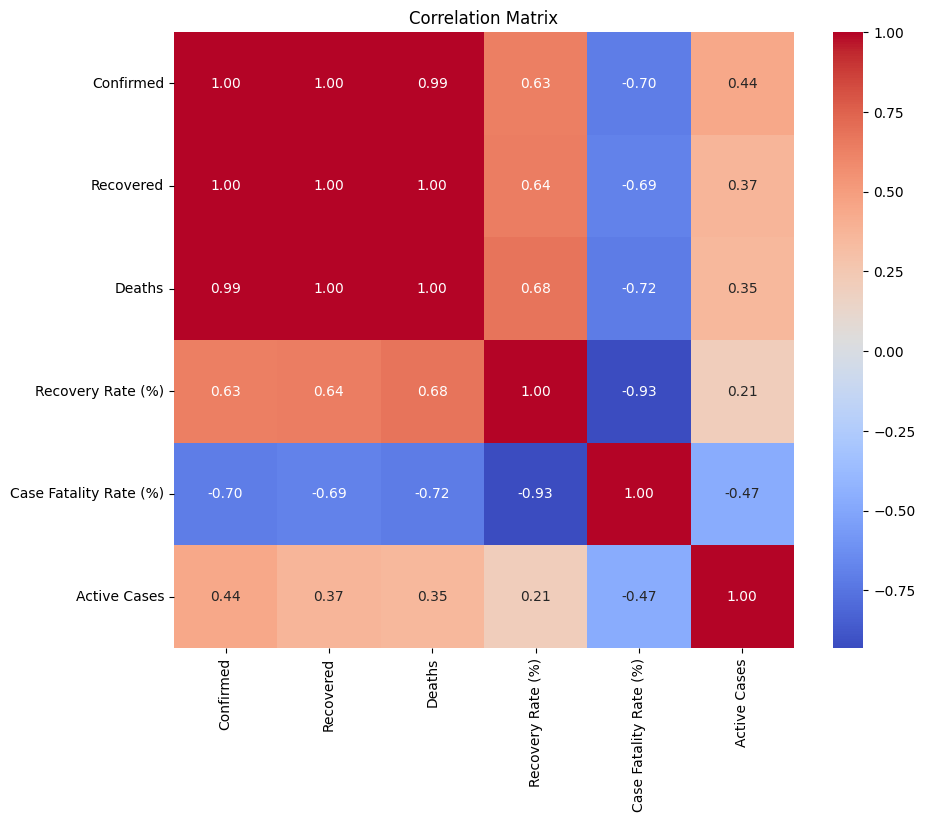

In [27]:
# Correlation Matrix
correlation_matrix = data[['Confirmed', 'Recovered', 'Deaths', 'Recovery Rate (%)', 'Case Fatality Rate (%)', 'Active Cases']].corr()

# Heatmap Visualization
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


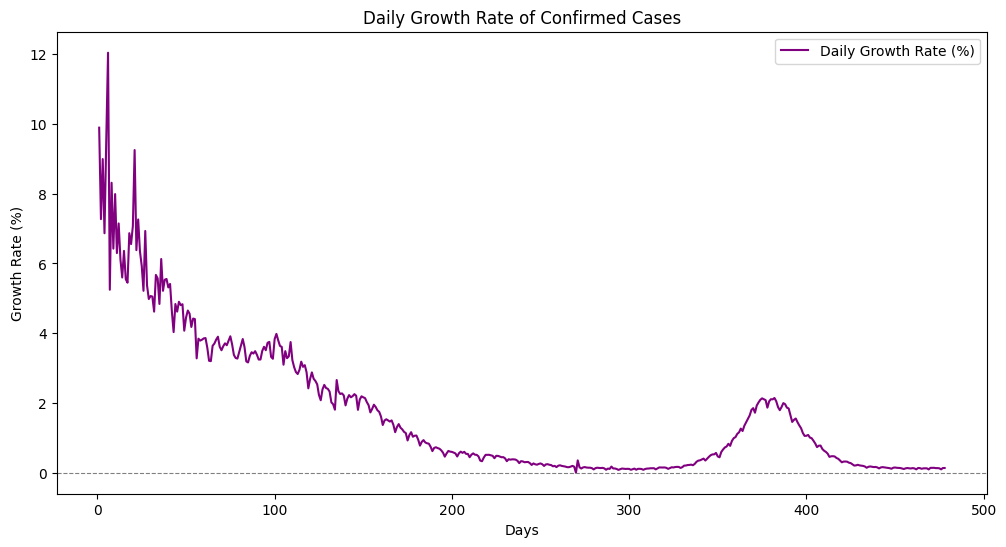

In [28]:
# Calculate Daily Growth Rate
data['Daily Growth Rate (%)'] = data['Confirmed'].pct_change() * 100

# Plot Growth Rate
plt.figure(figsize=(12, 6))
plt.plot(data['Daily Growth Rate (%)'], label='Daily Growth Rate (%)', color='purple')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel('Days')
plt.ylabel('Growth Rate (%)')
plt.title('Daily Growth Rate of Confirmed Cases')
plt.legend()
plt.show()


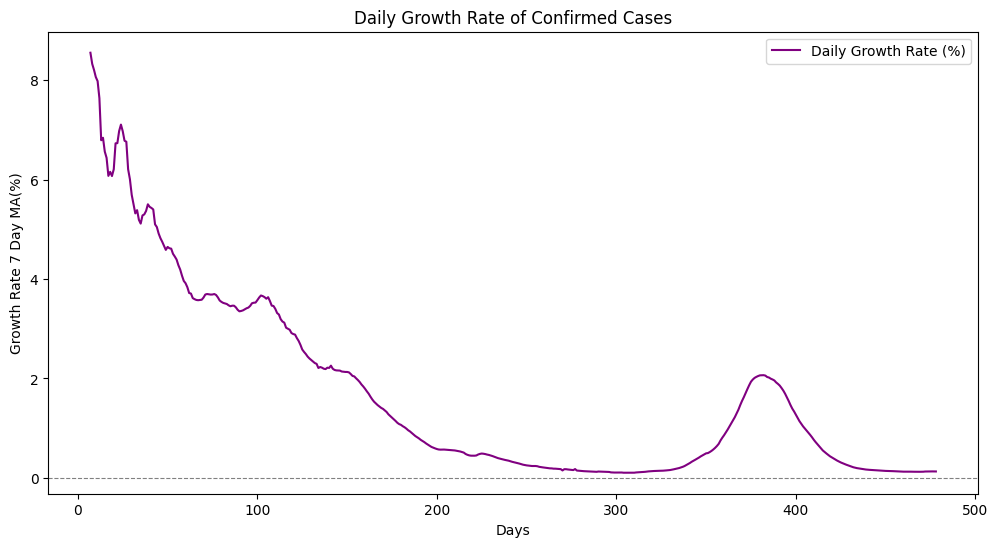

In [29]:
data['Growth Rate (7-day MA)'] = data['Daily Growth Rate (%)'].rolling(window=7).mean()
plt.figure(figsize=(12, 6))
plt.plot(data['Growth Rate (7-day MA)'], label='Daily Growth Rate (%)', color='purple')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel('Days')
plt.ylabel('Growth Rate 7 Day MA(%)')
plt.title('Daily Growth Rate of Confirmed Cases')
plt.legend()
plt.show()


In February end 2021, India got hit by the largest COVID wave. It is cited that people started becoming careless, not wearing masks and not following social distancing, around November- April. This wave caused a rapid surge in cases and deaths. Cases started to rise by March 2021, resulting in state-wide lockdowns. In Maharashtra there were total 4 phases of lockdowns from April to June.

hen cases rapidly increased in Maharashtra, CM Uddhav warned people on 28 March 2021, to imposed complete lockdown and night curfew was imposed. Schools and offices remained shut. On 4 April 2021 Maharashtra CM Uddhav Thackeray announced a lockdown until 30 April. On 5 April 2021 everything began to close due to rise in COVID-19 second wave. Only online deliveries were free at this stage. Films like Sooryavanshi, Bunty Aur Babli 2 got postponed due to COVID-19's 2nd Wave

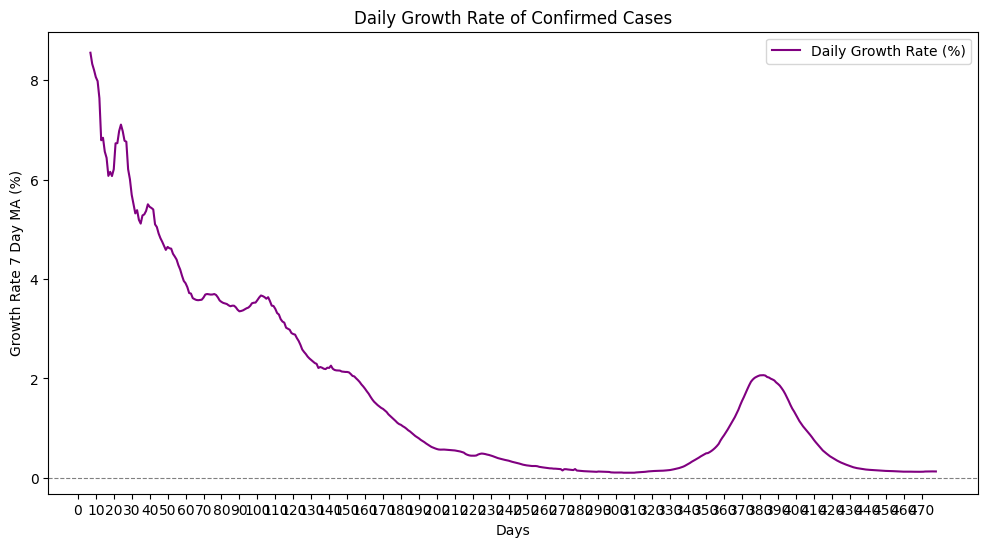

In [34]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it's already defined
data['Growth Rate (7-day MA)'] = data['Daily Growth Rate (%)'].rolling(window=7).mean()

# Plot the figure
plt.figure(figsize=(12, 6))
plt.plot(data['Growth Rate (7-day MA)'], label='Daily Growth Rate (%)', color='purple')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)

# Customizing the x-axis ticks
plt.xticks(range(0, len(data), 10))  # Change '10' to your preferred step for labels (0, 10, 20,...)

# Add labels and title
plt.xlabel('Days')
plt.ylabel('Growth Rate 7 Day MA (%)')
plt.title('Daily Growth Rate of Confirmed Cases')

# Add a legend
plt.legend()

# Show the plot
plt.show()


max growth rate at 30 days from start
which is around 11th May 
when it was expected 3rd lockdown would be final but it peaked again and one more lockdown had to be started


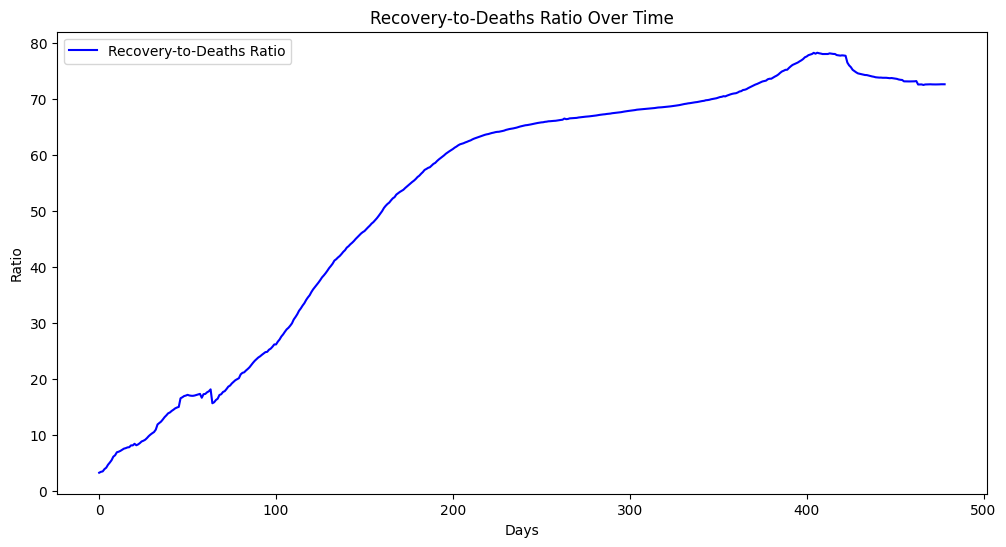

In [31]:
# Calculate Recovery-to-Deaths Ratio
data['Recovery-to-Deaths Ratio'] = data['Recovered'] / data['Deaths']

# Plot Recovery-to-Deaths Ratio
plt.figure(figsize=(12, 6))
plt.plot(data['Recovery-to-Deaths Ratio'], label='Recovery-to-Deaths Ratio', color='blue')
plt.xlabel('Days')
plt.ylabel('Ratio')
plt.title('Recovery-to-Deaths Ratio Over Time')
plt.legend()
plt.show()


In [ ]:
# Peaks in Active Cases
peak_active_cases = data['Active Cases'].max()
peak_date = data.loc[data['Active Cases'].idxmax(), 'Date']

print(f"Peak Active Cases: {peak_active_cases} on {peak_date}")


Peak Active Cases: 3745237 on 09-05-2021
